## 1. Import Modules and Data

In [9]:
from data import mnist_dataloader, cifar10_dataloader
from modules import DCGAN, GAN, WGAN
import torch
import config
from torchvision.utils import save_image, make_grid
import os
import matplotlib.pyplot as plt
import numpy as np

model_name = ["gan", "dcgan", "wgan"]

sample_mnist_dir = {
    name: os.path.join(config.sample_mnist_dir, name) for name in model_name
}
sample_cifar10_dir = {
    name: os.path.join(config.sample_cifar10_dir, name) for name in model_name
}

ckpt_mnist_dir = {
    name: os.path.join(config.ckpt_mnist_dir, name + ".pth") for name in model_name
}

ckpt_cifar10_dir = {
    name: os.path.join(config.ckpt_cifar10_dir, name + ".pth") for name in model_name
}


config.device

device(type='cuda', index=0)

## 2. Load Models

In [10]:
gan = GAN(
    z_dim=config.z_dim,
    output_dim=28 * 28,  # Output size for MNIST (28x28)
    gen_hidden_dims=[128, 256, 512, 1024],
    disc_hidden_dims=[512, 256, 128],
    leaky_relu_slope=config.leaky_relu_slope,
    device=config.device,
)
gan.load(ckpt_mnist_dir["gan"])

gan2 = GAN(
    z_dim=config.z_dim,
    output_dim=3 * 32 * 32,  # Output size for CIFAR10 (3x32x32)
    gen_hidden_dims=[128, 256, 512, 1024],
    disc_hidden_dims=[512, 256, 128],
    leaky_relu_slope=config.leaky_relu_slope,
    device=config.device,
)
gan2.load(ckpt_cifar10_dir["gan"])

dcgan = DCGAN(
    z_dim=config.z_dim,
    n_channel=1,  # Output size for MNIST (28x28)
    gen_hidden_dims=[512, 256, 128],
    gen_kernel_size=[4, 3, 4, 4],
    gen_stride=[1, 2, 2, 2],
    gen_padding=[0, 1, 1, 1],
    disc_hidden_dims=[128, 256, 512],
    disc_kernel_size=[4, 4, 3, 4],
    disc_stride=[2, 2, 2, 1],
    disc_padding=[1, 1, 1, 0],
    leaky_relu_slope=config.leaky_relu_slope,
    device=config.device,
)
dcgan.load(ckpt_mnist_dir["dcgan"])

dcgan2 = DCGAN(
    z_dim=config.z_dim,
    n_channel=3,  # Output size for MNIST (28x28)
    gen_hidden_dims=[512, 256, 128],
    gen_kernel_size=[4, 4, 4, 4],
    gen_stride=[1, 2, 2, 2],
    gen_padding=[0, 1, 1, 1],
    disc_hidden_dims=[128, 256, 512],
    disc_kernel_size=[4, 4, 4, 4],
    disc_stride=[2, 2, 2, 1],
    disc_padding=[1, 1, 1, 0],
    leaky_relu_slope=config.leaky_relu_slope,
    device=config.device,
)
dcgan2.load(ckpt_cifar10_dir["dcgan"])

wgan = WGAN(
    z_dim=config.z_dim,
    n_channel=1,  # Output size for MNIST (28x28)
    gen_hidden_dims=[512, 256, 128],
    gen_kernel_size=[4, 3, 4, 4],
    gen_stride=[1, 2, 2, 2],
    gen_padding=[0, 1, 1, 1],
    disc_hidden_dims=[128, 256, 512],
    disc_kernel_size=[4, 4, 3, 4],
    disc_stride=[2, 2, 2, 1],
    disc_padding=[1, 1, 1, 0],
    leaky_relu_slope=config.leaky_relu_slope,
    device=config.device,
)
wgan.load(ckpt_mnist_dir["wgan"])

wgan2 = WGAN(
    z_dim=config.z_dim,
    n_channel=3,  # Output size for CIFAR10 (3x32x32)
    gen_hidden_dims=[512, 256, 128],
    gen_kernel_size=[4, 4, 4, 4],
    gen_stride=[1, 2, 2, 2],
    gen_padding=[0, 1, 1, 1],
    disc_hidden_dims=[128, 256, 512],
    disc_kernel_size=[4, 4, 4, 4],
    disc_stride=[2, 2, 2, 1],
    disc_padding=[1, 1, 1, 0],
    leaky_relu_slope=config.leaky_relu_slope,
    device=config.device,
)
wgan2.load(ckpt_cifar10_dir["wgan"])

## 3. Inference


In [23]:
def sample_and_compare(models, dataloader):
    for model in models:
        model.eval()
    real_batch = next(iter(dataloader))

    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.axis("off")
    plt.title("Real Images")
    plt.imshow(
        make_grid(real_batch[0].cpu()[:64], nrow=8, normalize=True).permute(1, 2, 0)
    )

    for i, name, model in zip(range(2, 5), model_name, models):
        if name == "gan":
            shape = tuple(real_batch[0].shape[1:])
            fake_images = (
                model.generate(torch.randn(64, config.z_dim, device=config.device))
                .view(-1, *shape)
                .cpu()
            )
        else:
            fake_images = model.generate(
                torch.randn(64, config.z_dim, 1, 1, device=config.device)
            ).cpu()
        plt.subplot(2, 2, i)
        plt.imshow(make_grid(fake_images, nrow=8, normalize=True).permute(1, 2, 0))
        plt.axis("off")
        plt.title(name.upper())

    plt.tight_layout()
    plt.show()

MNIST:


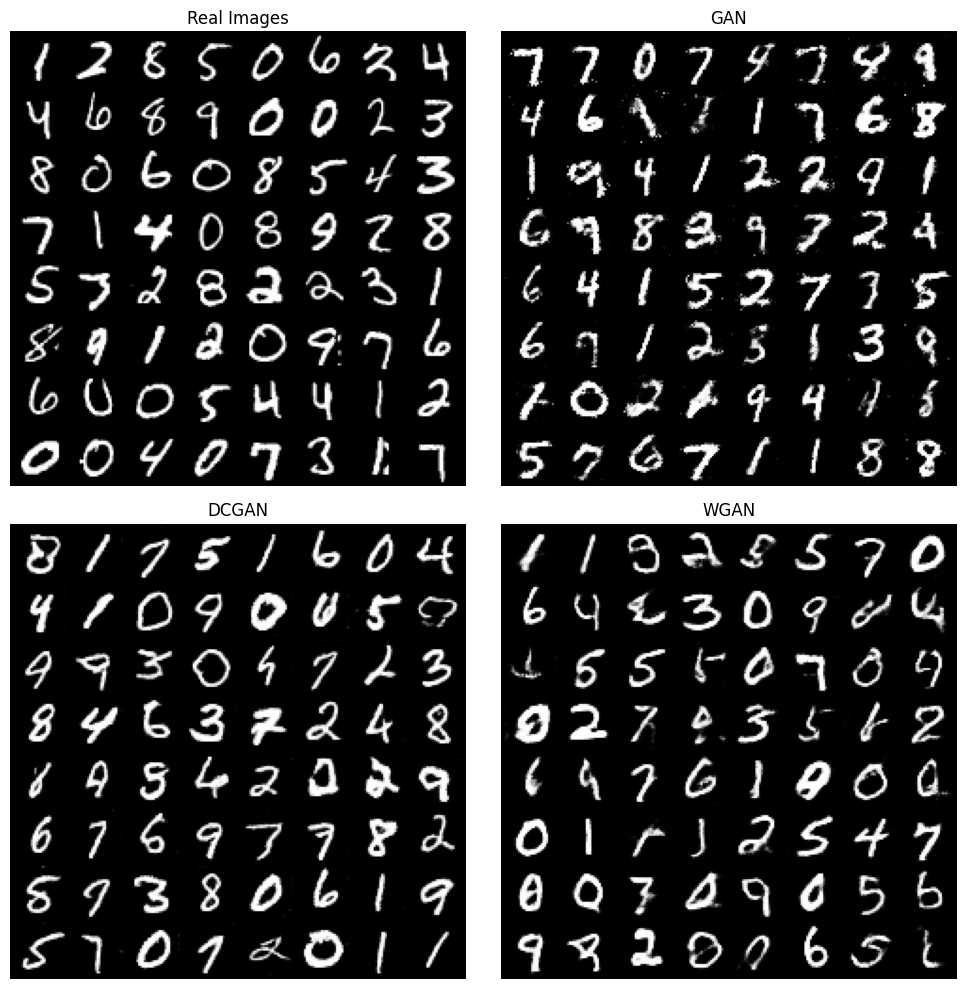

In [24]:
print("MNIST:")
sample_and_compare([gan, dcgan, wgan], mnist_dataloader)

CIFAR10:


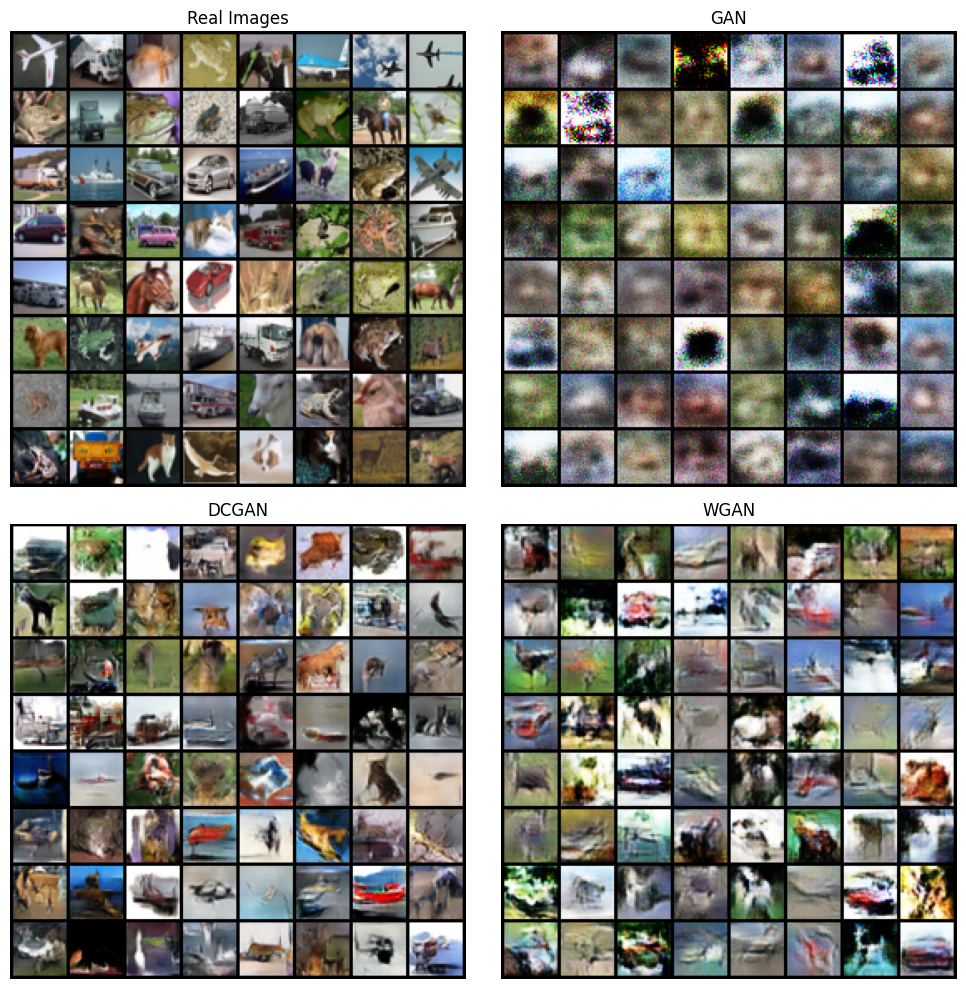

In [25]:
print("CIFAR10:")
sample_and_compare([gan2, dcgan2, wgan2], cifar10_dataloader)